In [1]:
import pandas as pd

#### Reading the data from CSV file

In [2]:
matches_data = pd.read_csv('IPL Matches 2008-2020.csv')
matches_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


# Total Matches : Result Declared by D/L Method

In [208]:
matches_data[matches_data["method"]=="D/L"].count()

id                 19
city               19
date               19
player_of_match    19
venue              19
neutral_venue      19
team1              19
team2              19
toss_winner        19
toss_decision      19
winner             19
result             19
result_margin      19
eliminator         19
method             19
umpire1            19
umpire2            19
dtype: int64

Ans : 19

# Matches Won by 10 Wickets

In [209]:
matches_data[(matches_data["result"]=="wickets") & (matches_data["result_margin"]==10.0)].count()

id                 14
city               14
date               14
player_of_match    14
venue              14
neutral_venue      14
team1              14
team2              14
toss_winner        14
toss_decision      14
winner             14
result             14
result_margin      14
eliminator         14
method              1
umpire1            14
umpire2            14
dtype: int64

Ans : 14

#### Some data cleaning part

In [210]:
matches_data["team1"] = matches_data["team1"].replace('Rising Pune Supergiants','Rising Pune Supergiant')
matches_data["team2"] = matches_data["team2"].replace('Rising Pune Supergiants','Rising Pune Supergiant')
matches_data["toss_winner"] = matches_data["toss_winner"].replace('Rising Pune Supergiants','Rising Pune Supergiant')
matches_data["winner"] = matches_data["winner"].replace('Rising Pune Supergiants','Rising Pune Supergiant')

# Teams Participated

In [211]:
import numpy as np
pd.Series(np.sort(matches_data["team1"].unique()))

0             Chennai Super Kings
1                 Deccan Chargers
2                  Delhi Capitals
3                Delhi Daredevils
4                   Gujarat Lions
5                 Kings XI Punjab
6            Kochi Tuskers Kerala
7           Kolkata Knight Riders
8                  Mumbai Indians
9                   Pune Warriors
10               Rajasthan Royals
11         Rising Pune Supergiant
12    Royal Challengers Bangalore
13            Sunrisers Hyderabad
dtype: object

# Matches won by each team

In [212]:
results = matches_data.groupby("winner").count()
results["result"].sort_values()

winner
Kochi Tuskers Kerala             6
Pune Warriors                   12
Gujarat Lions                   13
Rising Pune Supergiant          15
Delhi Capitals                  19
Deccan Chargers                 29
Sunrisers Hyderabad             66
Delhi Daredevils                67
Rajasthan Royals                81
Kings XI Punjab                 88
Royal Challengers Bangalore     91
Kolkata Knight Riders           99
Chennai Super Kings            106
Mumbai Indians                 120
Name: result, dtype: int64

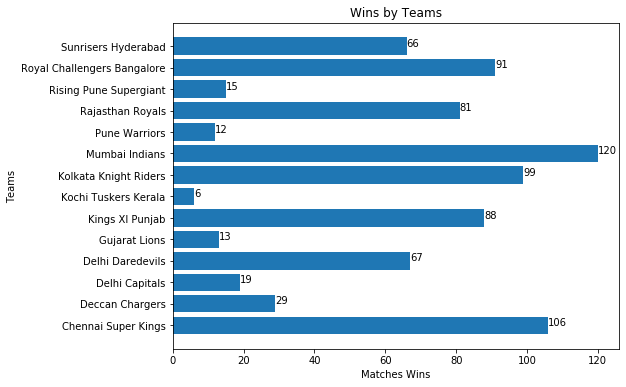

In [213]:
import matplotlib.pyplot as plt

teams = results.index
plt.figure(figsize=(8,6))
plt.barh(seasons,results["result"])
for index, value in enumerate(results["result"]):
    plt.text(value, index, str(value))
plt.title('Wins by Teams')
plt.xlabel('Matches Wins')
plt.ylabel('Teams')
plt.savefig('Matches won by Teams.png', dpi=300, bbox_inches='tight')
plt.show()

# Year wise no. of Matches

In [219]:
matches_data["date"] = pd.to_datetime(matches_data["date"])
matches_data["Season"]= matches_data["date"].dt.year

In [220]:
results = matches_data.groupby("Season").count()
results["result"]

Season
2008    58
2009    57
2010    60
2011    72
2012    74
2013    76
2014    60
2015    57
2016    60
2017    59
2018    60
2019    59
2020    60
Name: result, dtype: int64

# Number of stadiums hosting the matches

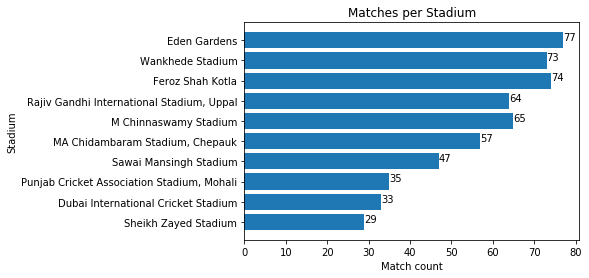

In [221]:
df = matches_data.groupby("venue").count()
df.sort_values(by="result")["id"]

top10 = df.sort_values(by="result")["id"].tail(10)
top10.values


players = top10.index
plt.barh(players,top10.values)
for index, value in enumerate(top10.values):
    plt.text(value, index, str(value))
plt.title('Matches per Stadium')
plt.xlabel('Match count')
plt.ylabel('Stadium')
plt.savefig('Stadiums.png', dpi=300, bbox_inches='tight')
plt.show()


# Most MOM AWARDS 

In [222]:
df = matches_data.groupby("player_of_match").count()

top10 = df.sort_values(by="result")["id"].tail(10)
top10.values

array([13, 13, 14, 16, 16, 17, 17, 18, 22, 23], dtype=int64)

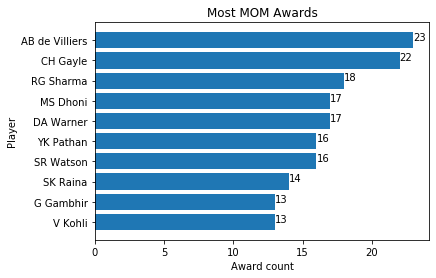

In [223]:
players = top10.index
plt.barh(players,top10.values)
for index, value in enumerate(top10.values):
    plt.text(value, index, str(value))
plt.title('Most MOM Awards')
plt.xlabel('Award count')
plt.ylabel('Player')
plt.savefig('MOM.png', dpi=300, bbox_inches='tight')
plt.show()

# Winning Margins by Runs

In [224]:
df = matches_data[(matches_data["result"]=="runs") & (matches_data["method"].isnull())]
df.head()                

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar,2008
9,335991,Chandigarh,2008-04-25,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,N,NaN,Aleem Dar,AM Saheba,2008
14,335996,Bangalore,2008-04-28,MS Dhoni,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13.0,N,NaN,BR Doctrove,RB Tiffin,2008


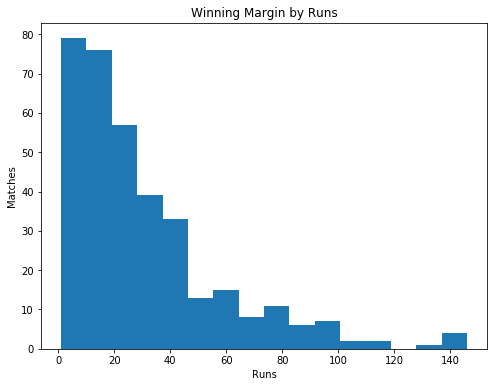

In [225]:
a = range(0,16)
plt.figure(figsize=(8,6))
plt.hist(df["result_margin"],bins=16)
plt.title('Winning Margin by Runs')
plt.xlabel('Runs')
plt.ylabel('Matches')
plt.savefig('Win by Runs.png', dpi=300, bbox_inches='tight')
plt.show()

# Matches won by Wickets 

In [226]:
df = matches_data[(matches_data["result"]=="wickets") & (matches_data["method"].isnull())]
df["result_margin"] = df["result_margin"].astype("int32")
results = df.groupby("result_margin").count()
results

C:\Users\Prashant Porwal\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,eliminator,method,umpire1,umpire2,Season
result_margin,,,,,,,,,,,,,,,,,
1,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3
2,6,6,6,6,6,6,6,6,6,6,6,6,6,0,6,6,6
3,18,18,18,18,18,18,18,18,18,18,18,18,18,0,18,18,18
4,41,40,41,41,41,41,41,41,41,41,41,41,41,0,41,41,41
5,79,77,79,79,79,79,79,79,79,79,79,79,79,0,79,79,79
6,87,86,87,87,87,87,87,87,87,87,87,87,87,0,87,87,87
7,82,79,82,82,82,82,82,82,82,82,82,82,82,0,82,82,82
8,60,59,60,60,60,60,60,60,60,60,60,60,60,0,60,60,60
9,38,38,38,38,38,38,38,38,38,38,38,38,38,0,38,38,38


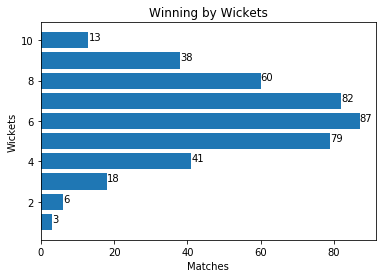

In [227]:
wickets = results.index
plt.barh(wickets,results["result"])
for index, value in enumerate(results["result"]):
    plt.text(value, index+1, str(value))
plt.title('Winning by Wickets')
plt.xlabel('Matches')
plt.ylabel('Wickets')
plt.savefig('Win by wickets.png', dpi=300, bbox_inches='tight')
plt.show()

In [228]:
df = pd.concat([matches_data["umpire1"],matches_data["umpire2"]],ignore_index=True)
results = df.groupby(df).count()
top10 = results.sort_values().tail(10)

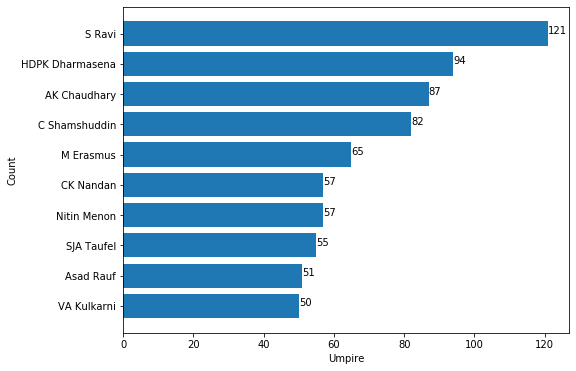

<Figure size 432x288 with 0 Axes>

In [232]:
umpires = top10.index
plt.figure(figsize=(8,6))
plt.barh(umpires,top10.values)
for index, value in enumerate(top10.values):
    plt.text(value, index, str(value))
    
plt.xlabel('Umpire')
plt.ylabel('Count')

plt.show()
plt.savefig('Umpires.png', dpi=300, bbox_inches='tight')

# Largest win by Runs

In [230]:
matches_data["result_margin"].max()

146.0

In [231]:
matches_data[matches_data["result_margin"]==146]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017
